In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, GlobalAveragePooling2D, Conv2D, Input, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet import ResNet50

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=0.1, height_shift_range=0.1,validation_split = 0.2)
path = 'C:/Users/Siva/Documents/VideoAnalytics/data/outside'
train_generator = train_datagen.flow_from_directory(path,
                        target_size = (224,224),
                        batch_size = 32,
                        class_mode ="categorical",
                        subset = "training")
val = train_datagen.flow_from_directory(path,
                        target_size = (224,224),
                        batch_size = 32,
                        class_mode ="categorical",
                            subset = "validation")

Found 4222 images belonging to 2 classes.
Found 1054 images belonging to 2 classes.


In [4]:
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
output = restnet.layers[-1].output
output = keras.layers.Flatten()(output)
restnet = Model(restnet.input,output)
for layer in restnet.layers:
    layer.trainable = False
restnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 7, 7, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 7, 7, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [5]:
from keras.models import Sequential
from keras import optimizers
model = Sequential()
model.add(restnet)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          (None, 100352)            23587712  
                                                                 
 dense (Dense)               (None, 512)               51380736  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 128)               3

In [6]:
model.compile(loss='categorical_crossentropy', optimizer = keras.optimizers.Adam(learning_rate=0.001), metrics='accuracy')

In [7]:
history = model.fit(train_generator,validation_data=val, batch_size = 32, epochs = 5, verbose = 1)

Epoch 1/5
132/132 [==============================] - 576s 4s/step - loss: 1.0444 - accuracy: 0.5552 - val_loss: 0.6978 - val_accuracy: 0.5541
Epoch 2/5
132/132 [==============================] - 559s 4s/step - loss: 0.5573 - accuracy: 0.7162 - val_loss: 0.7572 - val_accuracy: 0.5674
Epoch 3/5
132/132 [==============================] - 615s 5s/step - loss: 0.4685 - accuracy: 0.7477 - val_loss: 1.2053 - val_accuracy: 0.5465
Epoch 4/5
132/132 [==============================] - 660s 5s/step - loss: 0.5776 - accuracy: 0.6973 - val_loss: 0.6765 - val_accuracy: 0.5911
Epoch 5/5
132/132 [==============================] - 633s 5s/step - loss: 0.6768 - accuracy: 0.5912 - val_loss: 0.6766 - val_accuracy: 0.5911


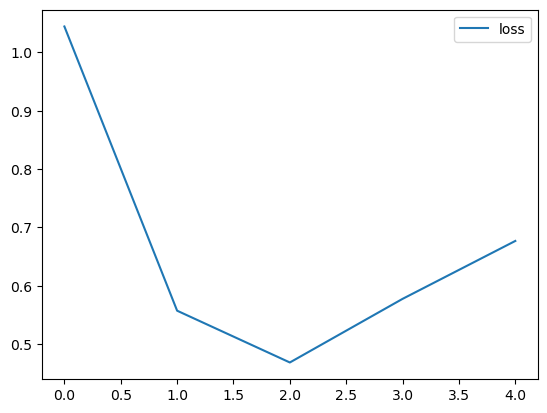

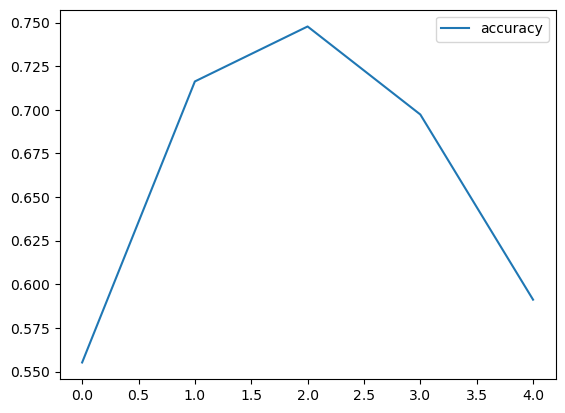

In [8]:
from matplotlib import pyplot as plt
plt.figure()
plt.plot(history.history['loss'])
plt.legend(['loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.legend(['accuracy'],loc='upper right')
plt.show()

In [14]:
val_loss = [0.6978, 0.7572, 1.2053, 0.6765, 0.6766]
val_acc = [0.5541,0.5674, 0.5465, 0.5911, 0.5911]
epochs = [1,2,3,4,5]

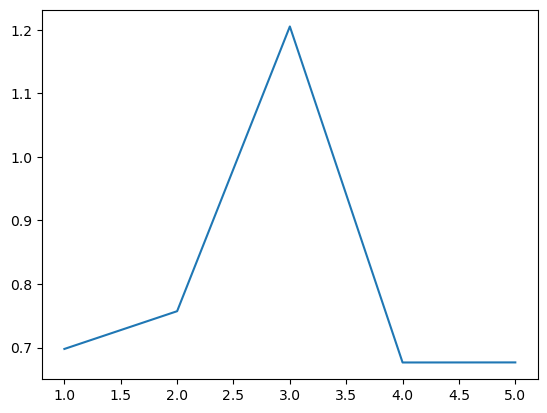

In [15]:
plt.plot(epochs, val_loss)

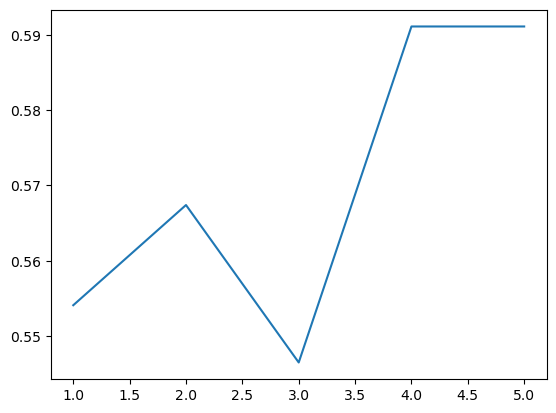

In [16]:
plt.plot(epochs,val_acc)

In [17]:
model.save('resnet_model_2.h5')